# Presentation for Imperial

Setup questions should be in the README, if you're having trouble, raise an issue on Github or drop me an email.

In [1]:
import nltk
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Let's download some data to test with
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aaron/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

sentences = [
    'Imperial is a great university',
    "I don't enjoy coding in Perl",
    'BlackRock is the best',
    'BlackRock is the best!!!',
]

for sentence in sentences:
    print(sentence)
    
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    
    print()
    print('------')
    
# The log message at the bottom is nothing to worry about here

Imperial is a great university
compound: 0.6249, neg: 0.0, neu: 0.423, pos: 0.577, 
------
I don't enjoy coding in Perl
compound: -0.3875, neg: 0.396, neu: 0.604, pos: 0.0, 
------
BlackRock is the best
compound: 0.6369, neg: 0.0, neu: 0.417, pos: 0.583, 
------
BlackRock is the best!!!
compound: 0.7249, neg: 0.0, neu: 0.371, pos: 0.629, 
------


/Users/aaron/code/aaroncritchley/imperial-talk/venv/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Sentiment of 'realDonaldTrump'

Here's some code for a quick analysis of Trumps tweets by the source of the tweet, we care about iPhone vs Android as per: http://varianceexplained.org/r/trump-tweets/

In [3]:
import tweepy

# You can get this information on apps.twitter.com, you can replace them with strings if you want
# but make sure you don't share your access keys by accident!
# If you don't know how to set environment variables, just google 'Set env variable {your OS}' :-)
auth = tweepy.OAuthHandler(os.environ['TWITTER_KEY'], os.environ['TWITTER_SECRET'])
auth.set_access_token(os.environ['TWITTER_ACCESS_KEY'], os.environ['TWITTER_ACCESS_SECRET'])

api = tweepy.API(auth)

In [4]:
pages = 200
tweets = []

for pnum in range(pages):
    tweets.extend(api.user_timeline('realDonaldTrump', page=pnum))
    if pnum % 25 == 0:
        print('Downloaded {} pages...'.format(pnum))

print('Most recent tweet is:')
print(tweets[0].text)

Downloaded 0 pages...
Downloaded 25 pages...
Downloaded 50 pages...
Downloaded 75 pages...
Downloaded 100 pages...
Downloaded 125 pages...
Downloaded 150 pages...
Downloaded 175 pages...
Most recent tweet is:
Interview with @LouDobbs coming up at 7pmE on @FoxBusiness. Enjoy! https://t.co/9V9z015kVl


In [5]:
from collections import defaultdict

split_by_source = defaultdict(list)

print('Total tweet count: ' + str(len(tweets)))
print('---------')

for tweet in tweets:
    split_by_source[tweet.source].append(tweet)

for k, v in split_by_source.items():
    print(k + ': ' + str(len(v)))

Total tweet count: 3223
---------
Twitter for iPhone: 2290
Media Studio: 99
Twitter Web Client: 133
Twitter Ads: 34
Twitter for Android: 651
Periscope: 1
Twitter for iPad: 15


In [6]:
keys_we_dont_care_about = []

for k, v in split_by_source.items():
    # This is set at an arbitrary value, you could easily change this to filter based on a dynamic number though!
    if len(v) < 150:
        keys_we_dont_care_about.append(k)

In [7]:
for k in keys_we_dont_care_about:
    del split_by_source[k]

In [8]:
# Just checking we've filtered out what we want to
for k, v in split_by_source.items():
    print(k + ': ' + str(len(v))) 

Twitter for iPhone: 2290
Twitter for Android: 651


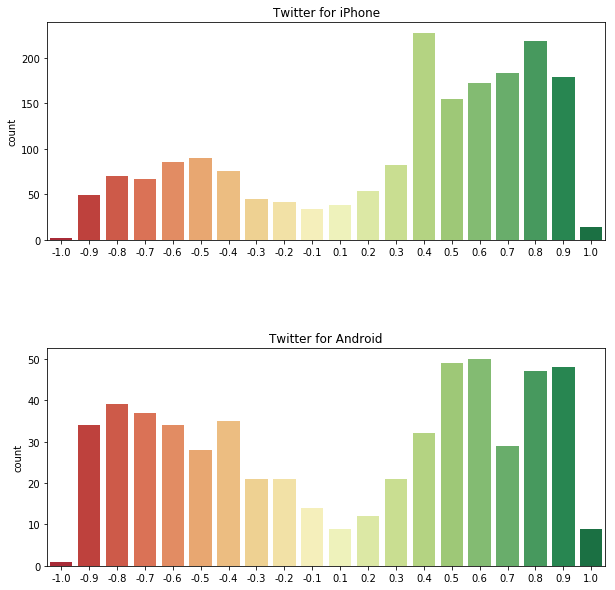

In [9]:
fig, axs = plt.subplots(nrows=len(split_by_source), figsize=(10,10))
fig.subplots_adjust(hspace=.5)
axes_count = 0

# This graphing is very very ugly, and has some problems, like what if there are no tweets for a certain sentiment?
# This would be easy to fix and maybe fun if you've not dealt with it before, PR's welcome.
for key, source_tweets in split_by_source.items():
    scored_tweets = [(sid.polarity_scores(tweet.text), tweet.text) for tweet in source_tweets]

    scores = [round(s['compound'], 1) for s, t in scored_tweets]
    scores_no_neutral = [s for s in scores if s]

    plot = sns.countplot(scores_no_neutral, palette='RdYlGn', ax=axs[axes_count])
    plot.set_title(key)
    axes_count += 1

It's easy to imagine how sentiment analysis could be applied to generate alpha here, dropping our analytics (we'd obviosuly need a lot more like topic extraction) above into a model would be easy.


# What about image classification?
Image classification is very useful in lots of ways, some cool applications of this to generate alpha can be found here: https://www.wired.com/2015/03/orbital-insight/


These examples use ImageNet, which can be found here - https://www.tensorflow.org/tutorials/image_recognition

![Puppy](golden.jpg)

In [10]:
# The ! makes it run on the terminal underneath, this was just a demo to show how easy we aim to make
# interacting with models like this.

# Note: If you're getting weird log warnings when running this you can set 'TF_CPP_MIN_LOG_LEVEL'=2 to stop them. 
# Just uncomment the line below and re-run:
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
!python classify_image.py --image_file=golden.jpg

golden retriever (score = 0.82660)
Labrador retriever (score = 0.04462)
kuvasz (score = 0.00533)
doormat, welcome mat (score = 0.00446)
tennis ball (score = 0.00364)


![Mountains](mountain_range.jpg)

In [11]:
!python classify_image.py --image_file=mountain_range.jpg

valley, vale (score = 0.75669)
alp (score = 0.16014)
lakeside, lakeshore (score = 0.00299)
cliff, drop, drop-off (score = 0.00298)
Band Aid (score = 0.00118)


# News example

In [12]:
# Note this library is 'haxor', not 'hackernews' - install using pip.
# And just incase you've not come across HN before - https://news.ycombinator.com/
from hackernews import HackerNews

hn = HackerNews()

stories = [hn.get_item(story_id) for story_id in hn.top_stories(limit=100)]

print('Downloaded {} stories in total'.format(len(stories)))

Downloaded 100 stories in total


In [13]:
# Filtering with anything here is trivial, look at other news sources and see how you could do similar things - 
# maybe you'll have to scrape if they don't give you a nice API. :-)
filtered = [s for s in stories if s.title and s.url]
goog_stories = [s for s in filtered if 'google' in s.title.lower()]

msg = """
Hey,

Here are the top stories about Google on HN this morning:

%s
""" % ' \n\n'.join([s.title + ' | ' + s.url for s in goog_stories])

print(msg)


Hey,

Here are the top stories about Google on HN this morning:

DxO acquires Nik Collection assets from Google | https://nikcollection.dxo.com/ 

How we moved to Google Cloud using Consul and ZeroTier with zero downtime | https://tech.channable.com/posts/2017-10-25-how-we-moved-to-google-cloud-using-consul-and-zerotier.html

